In [1]:
using ColoringNames
using JLD
using MLLabelUtils
using MLDataPattern
using Plots
using DataFrames

In [43]:
full_param_path = "../models/good/1706031148_sib0.5/params.jld"
full_params = load(full_param_path)
#
#
full_mdl = restore(TermToColorDistributionNetwork, full_param_path, full_params["model_path"])


ColoringNames.TermToColorDistributionNetwork{311,SubString{String},TensorFlow.Tensor{Any}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("topaz"=>290,"russet"=>255,"berry"=>34,"celery"=>86,"lipstick"=>199,"dull"=>139,"pink"=>21,"chocolate"=>93,"cerise"=>87,"egg"=>138…)),Session(Ptr{Void} @0x00007ff6c6d4c9b0),<Tensor Group:1 shape=unknown dtype=Any>,4,64,128,16)

In [44]:
empirical_params_path = "/mnt_obj/color/models/noml_validation/sib0.5_or64/params_with_model.jld"
empirical_params = load(empirical_params_path)
empiri_mdl = empirical_params["model"];

In [71]:
gr()

Plots.GRBackend()

In [73]:
pyplot()

Plots.PyPlotBackend()

# Plots for network diagram


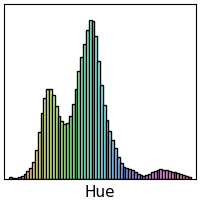


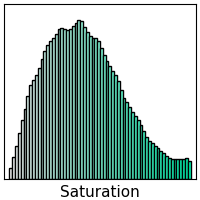


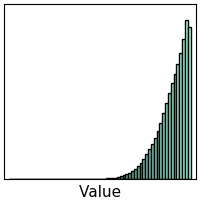

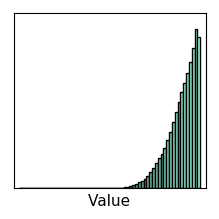

(h_max,s_max,v_max) = (0.453125,0.390625,0.984375)


In [74]:
function plot_3hsv(hp::Vector, sp::Vector, vp::Vector)
    nbins = length(hp)
    @assert nbins == length(sp) == length(vp)
    h_max, s_max, v_max = (indmax.([hp, sp, vp]))/nbins
    @show h_max, s_max, v_max
    h_bar_colors = ColoringNames.hsv2colorant([linspace(0.0,1.0, nbins) s_max*ones(nbins) v_max*ones(nbins)])
    s_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) linspace(0.0,1.0, nbins) v_max*ones(nbins)])
    v_bar_colors = ColoringNames.hsv2colorant([h_max*ones(nbins) s_max*ones(nbins) linspace(0.0,1.0, nbins)])
    
    for (ps,cs,lbl) in zip([hp, sp, vp], [h_bar_colors, s_bar_colors, v_bar_colors], ["Hue", "Saturation", "Value"])
        bar(ps,
            width=1,
            legend = false,
            linewidth=0, 
            seriescolor=cs,
            xlabel=lbl,
            size=(200,200),
            yticks=nothing,
            xticks = nothing,
        grid=false,
        
        ) |> IJulia.display
        
        savefig(joinpath("figs", "netdia", "$(lbl).pdf"))
    end
end
plot_3hsv(query(full_mdl, "light greenish blue")...)

# Plots for discussing  Multimodality

In [103]:
function plot_hsv_both(colorname)
    filename(prefix)=joinpath("figs", "multimodal", "$(prefix)$(join(split(colorname))).pdf")
    try
        plot_hsv(query(empiri_mdl, colorname)...;
            title=[ "" "Empirical Model: $colorname" ""]) |> IJulia.display
        savefig(filename("empiri"))
    catch err
        if isa(err, KeyError)
            println("No emprical data for $colorname")
        end
    end
    plot_hsv(query(full_mdl, colorname)...;
        title=["" "GRU Model: $colorname" ""]) |> IJulia.display
    savefig(filename("gru"))
end

plot_hsv_both (generic function with 1 method)


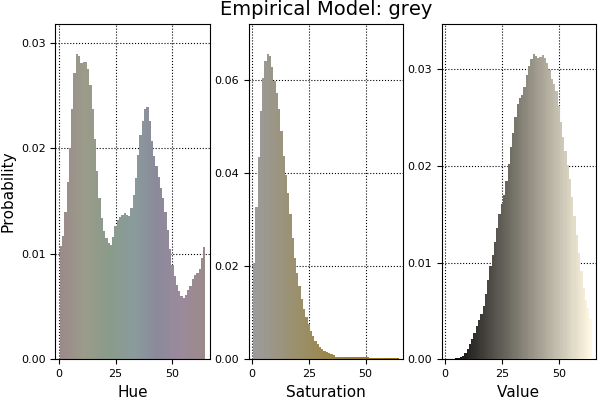

(h_max,s_max,v_max) = (0.125,0.109375,0.609375)



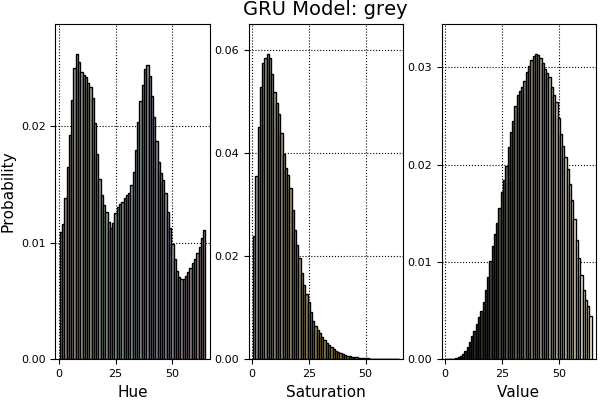

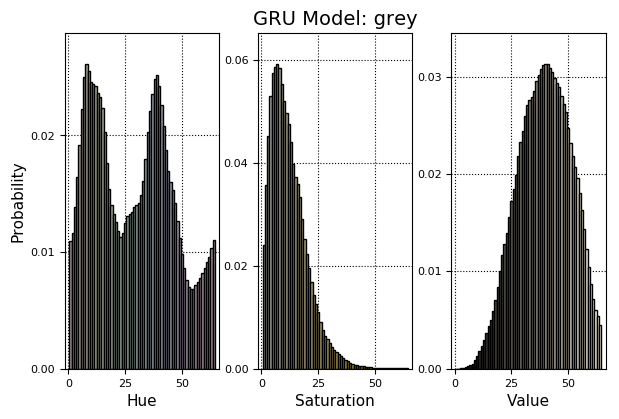

(h_max,s_max,v_max) = (0.125,0.109375,0.625)


In [104]:
plot_hsv_both("grey")


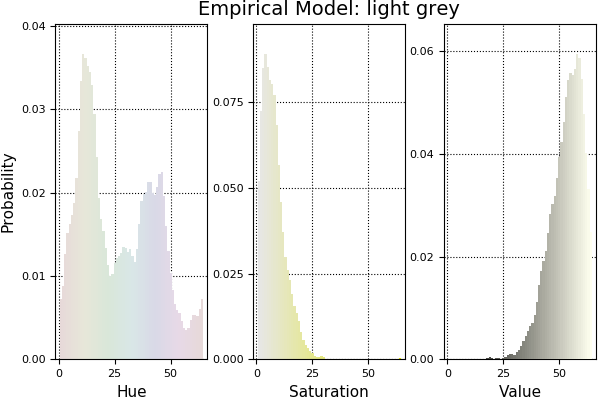

(h_max,s_max,v_max) = (0.171875,0.0625,0.90625)



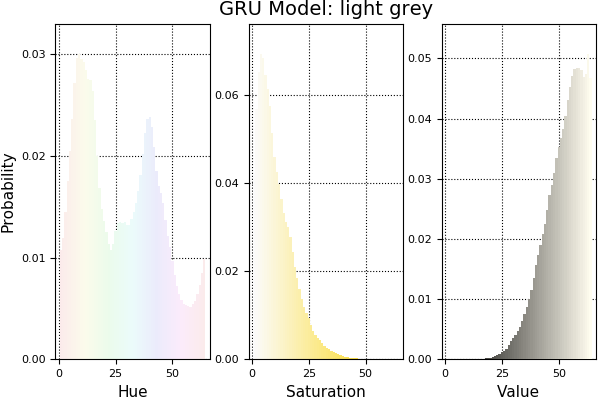

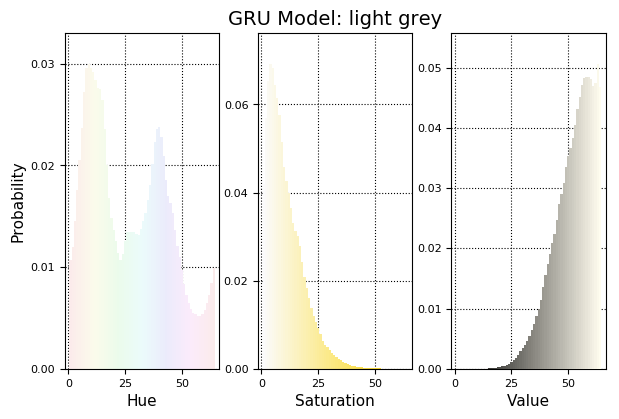

In [97]:
plot_hsv_both("light grey")


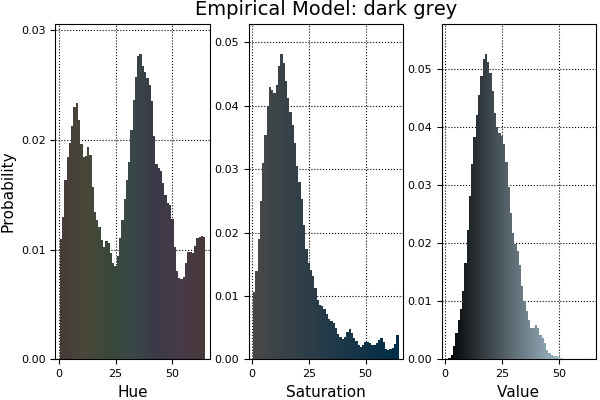

(h_max,s_max,v_max) = (0.5625,0.203125,0.28125)



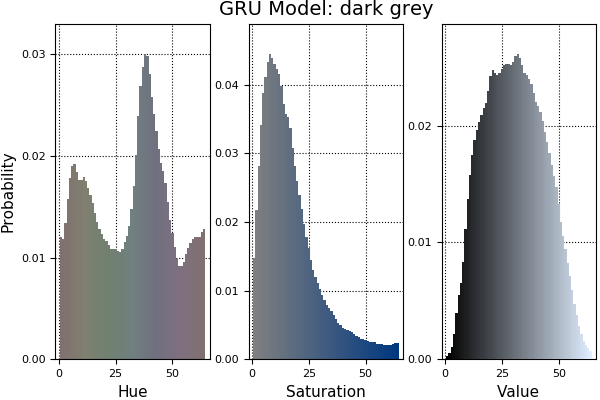

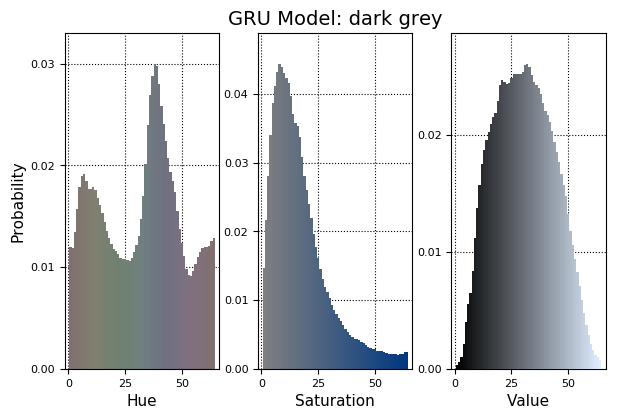

In [98]:
plot_hsv_both("dark grey")


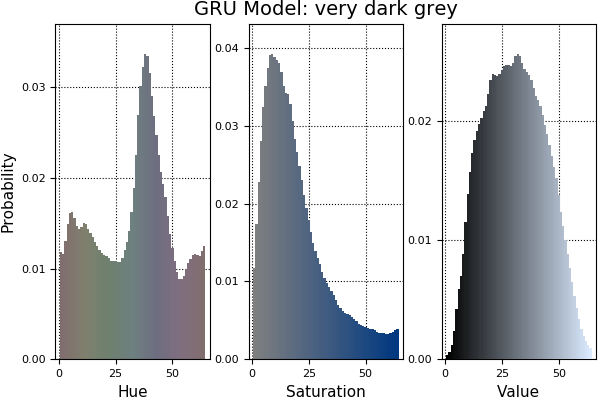

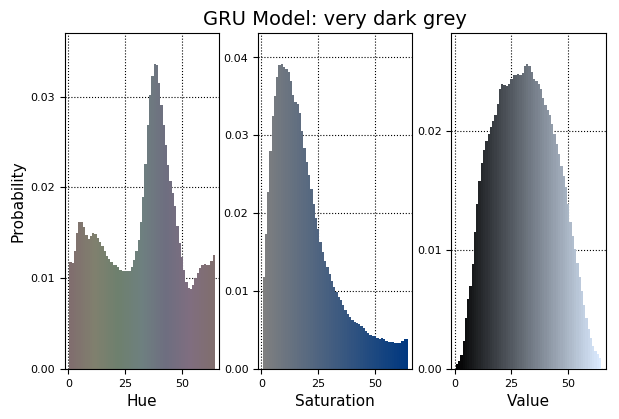

No emprical data for very dark grey
(h_max,s_max,v_max) = (0.59375,0.140625,0.5)


In [99]:
plot_hsv_both("very dark grey")


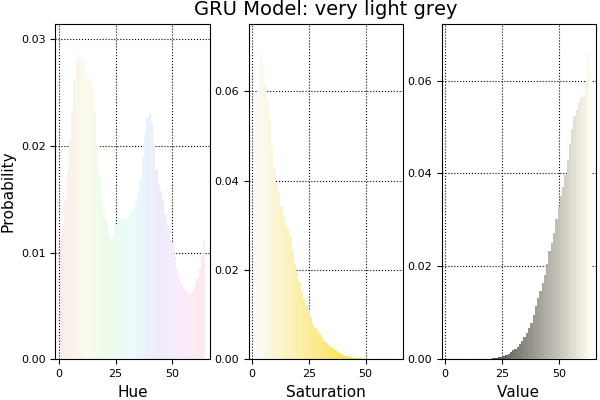

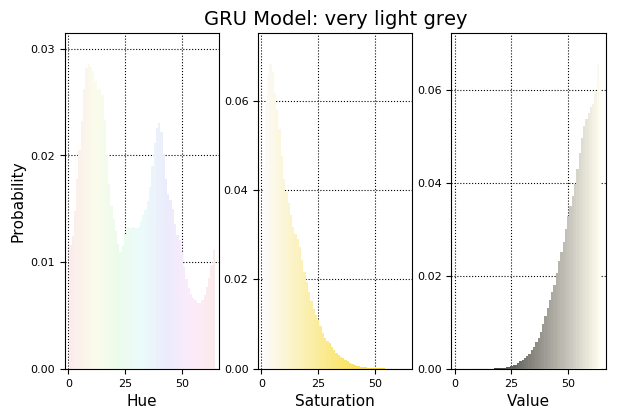

No emprical data for very light grey
(h_max,s_max,v_max) = (0.140625,0.0625,0.984375)


In [100]:
plot_hsv_both("very light grey")